# Exploración csv. 🧐

❗ A continuación, se llevará a cabo la exploración del csv con el objetivo de conocer los datos y poder abordar el correcto modelo.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../../data/precio/jovenes.csv", index_col = 0)
df.head(2)

,Nombre jugador,Equipo actual,edad,pais,Valoración_actual,Progresión,precio,Valoración equipo actual,Mejor valoración,Ataque,Regate,Aceleración,Potencia_tiro,Agresividad,Defensa,Portería
0,gaston-alvarez,getafe-cf,21,Uruguay,70,80,3300000,76,72,54,47,62,35,65,67,10
1,abdessamad-ezzalzouli,fc-barcelona,19,Morocco,70,83,3800000,83,70,59,80,84,65,34,25,7


In [5]:
df.shape

(418, 16)

In [6]:
df.dtypes

Nombre jugador              object
Equipo actual               object
edad                         int64
pais                        object
Valoración_actual            int64
Progresión                   int64
precio                       int64
Valoración equipo actual     int64
Mejor valoración             int64
Ataque                       int64
Regate                       int64
Aceleración                  int64
Potencia_tiro                int64
Agresividad                  int64
Defensa                      int64
Portería                     int64
dtype: object

In [7]:
df.isnull().sum()

Nombre jugador              0
Equipo actual               0
edad                        0
pais                        0
Valoración_actual           0
Progresión                  0
precio                      0
Valoración equipo actual    0
Mejor valoración            0
Ataque                      0
Regate                      0
Aceleración                 0
Potencia_tiro               0
Agresividad                 0
Defensa                     0
Portería                    0
dtype: int64

In [8]:
df.columns

Index(['Nombre jugador', 'Equipo actual', 'edad', 'pais', 'Valoración_actual',
       'Progresión', 'precio', 'Valoración equipo actual', 'Mejor valoración',
       'Ataque', 'Regate', 'Aceleración', 'Potencia_tiro', 'Agresividad',
       'Defensa', 'Portería'],
      dtype='object')

1️⃣🤔 En el gráfico que se presenta a continuación, es posible observar la correlación entre las distintas variables. 

➡ De este modo, podemos determinar qué variables eliminar o cuales aportan los mismos datos. Por ejemplo, valoración actual y mejor valoración aportan casi la misma información, por lo que no sería necesario disponer de ambas.

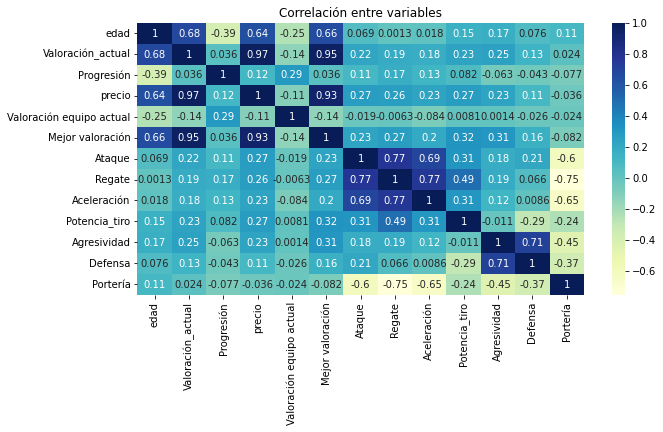

In [9]:
plt.figure(figsize = (10,5))

sns.heatmap(df.corr(),
            cmap = "YlGnBu",
           annot = True)

plt.title('Correlación entre variables');

2️⃣ En los siguientes gráficos, se observa la distribución de cada una de las características de los jugadores.

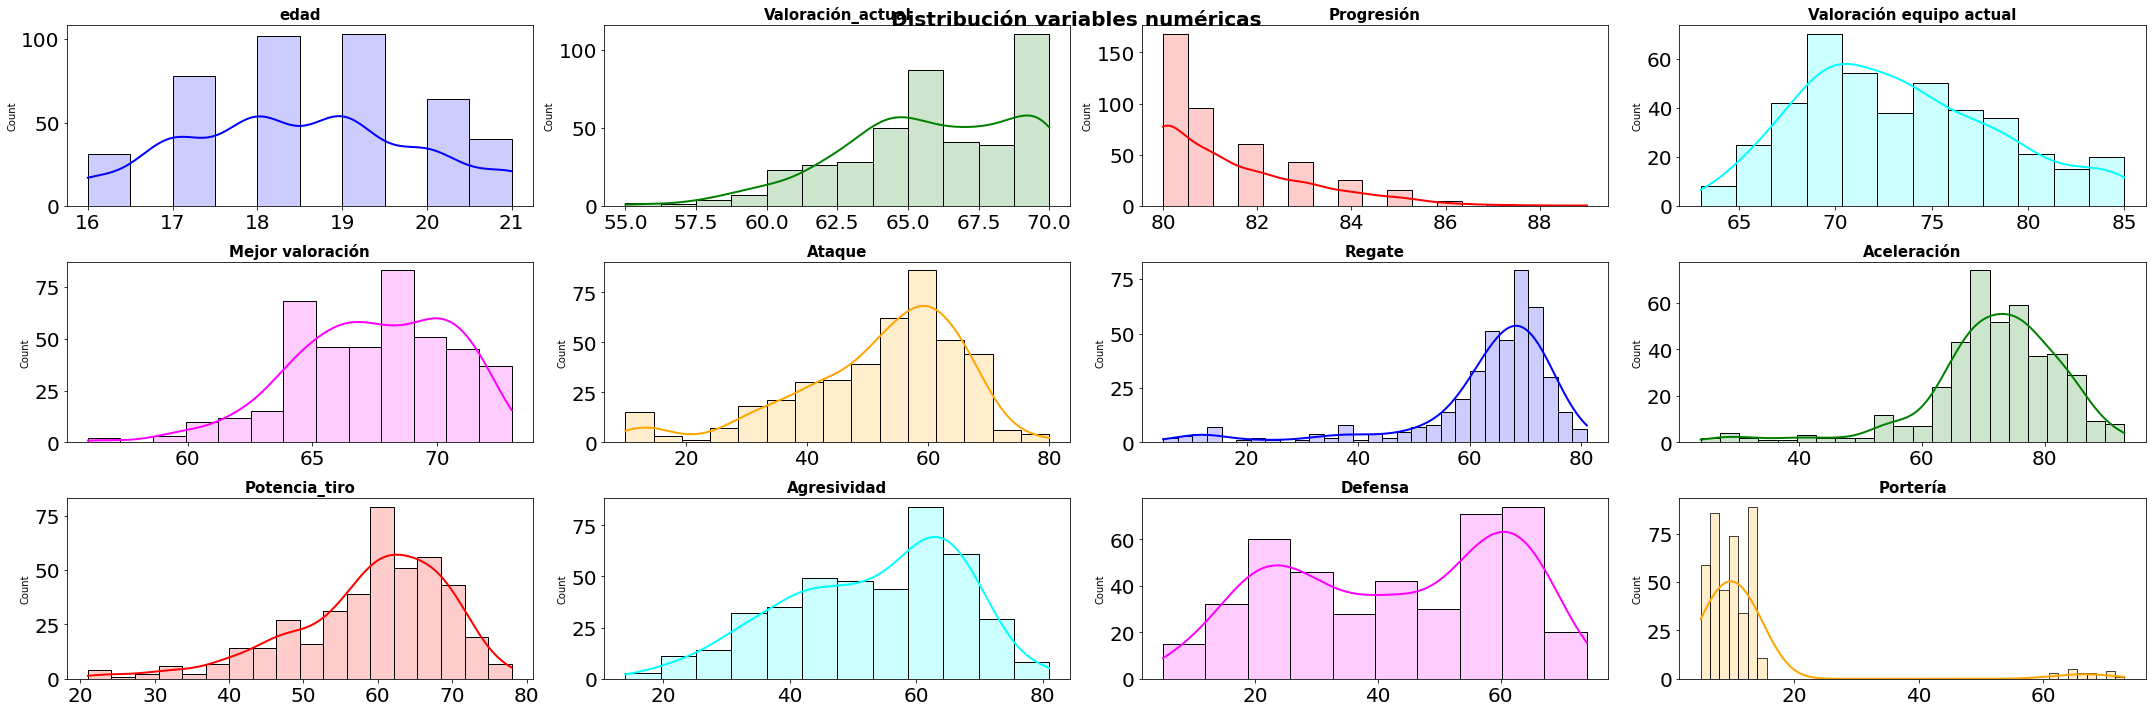

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 10)) 
lista_colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'blue', 'green', 'red', 'cyan', 'magenta', 'orange']
axes = axes.flat

columnas_numeric = df.select_dtypes(include= np.number).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        kde     = True,
        color   = lista_colores[i],
        line_kws= {'linewidth': 2},
        alpha   = 0.2,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.tight_layout()
fig.suptitle('Distribución variables numéricas', fontsize = 20, fontweight = "bold");

3️⃣ Por otro lado, el análisis de cada variable se hace también en relación a la variable respuesta precio. 

🧐 Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con el precio y de qué forma.

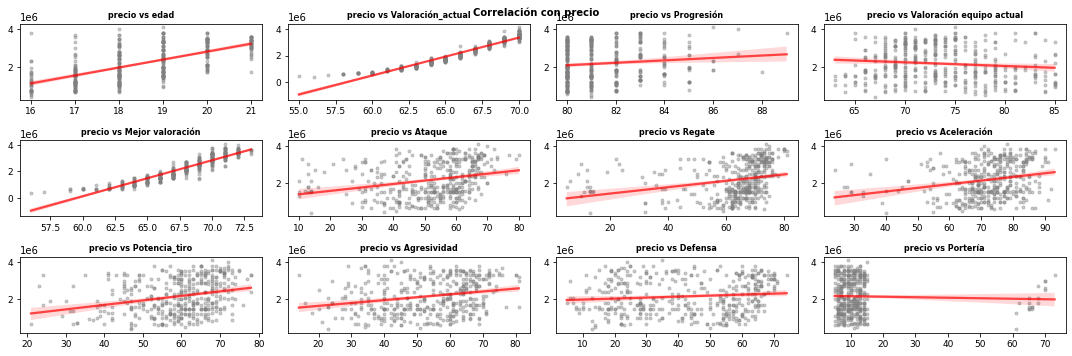

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 5))

axes = axes.flat

columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')


for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['precio'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    
fig.tight_layout() 
plt.subplots_adjust(top = 0.9) 
plt.tight_layout()
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

4️⃣ A continuación, después de este primer análisi procedemos a eliminar las columnas que no suponen un aporte al modelo.

❕ **Nombre jugador, equipo actual y edad**: no son datos numéricos y no influyen en el precio.
    
❕ **Mejor valoración**: disponemos de la valoración actual, por lo que, al aportar la misma información, no la precisamos.
    
❕ **Valoración equipo actual**: la valoración del equipo en el que se encuentra no afecta al precio individual.
   

In [12]:
df.drop(columns = ['Nombre jugador', 'Valoración equipo actual', 'Mejor valoración', 'Equipo actual', 'pais'], inplace = True)
df.head()

,edad,Valoración_actual,Progresión,precio,Ataque,Regate,Aceleración,Potencia_tiro,Agresividad,Defensa,Portería
0,21,70,80,3300000,54,47,62,35,65,67,10
1,19,70,83,3800000,59,80,84,65,34,25,7
2,17,70,82,3600000,59,72,79,70,60,40,6
3,20,70,81,3500000,46,67,71,75,64,30,12
4,21,70,81,3600000,58,71,73,73,74,19,5


In [13]:
df.to_csv('../../data/precio/dflimpio.csv')